In [1]:
import pandas as pd
import dateutil
import time

In [2]:
data_january = pd.read_csv("./data/1january.csv.zip", compression='zip', header=0, sep=',')
data_january = data_january.iloc[0::10,:]
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.00,8.80,2
10,2016-01-01 00:00:03,40.72154,-73.98902,0.01,4,2016-01-01 00:00:11,40.72170,-73.98896,2.5,0.0,1.3,0.00,3.80,2
20,2016-01-01 00:00:07,40.67212,-73.95303,4.90,2,2016-01-01 00:20:35,40.71059,-73.98657,19.0,0.0,1.3,4.06,24.36,1
30,2016-01-01 00:00:14,40.74424,-73.99560,2.40,1,2016-01-01 00:13:02,40.76871,-73.98546,11.0,0.0,1.3,3.05,15.35,1
40,2016-01-01 00:00:20,40.75770,-73.98224,13.00,1,2016-01-01 00:29:05,40.86205,-73.90931,36.5,0.0,1.3,0.00,37.80,2


In [3]:
type(data_january.iloc[0,0])

str

In [4]:
data_january.shape

(1090686, 14)

In [5]:

start = time.time()

In [6]:
data_january['pickup_datetime'] = data_january['pickup_datetime'].apply(dateutil.parser.parse)
data_january['dropoff_datetime'] = data_january['dropoff_datetime'].apply(dateutil.parser.parse)
end = time.time()
duration = end -start
duration

217.12972784042358

In [7]:
data_january.shape

(1090686, 14)

In [8]:
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.00,8.80,2
10,2016-01-01 00:00:03,40.72154,-73.98902,0.01,4,2016-01-01 00:00:11,40.72170,-73.98896,2.5,0.0,1.3,0.00,3.80,2
20,2016-01-01 00:00:07,40.67212,-73.95303,4.90,2,2016-01-01 00:20:35,40.71059,-73.98657,19.0,0.0,1.3,4.06,24.36,1
30,2016-01-01 00:00:14,40.74424,-73.99560,2.40,1,2016-01-01 00:13:02,40.76871,-73.98546,11.0,0.0,1.3,3.05,15.35,1
40,2016-01-01 00:00:20,40.75770,-73.98224,13.00,1,2016-01-01 00:29:05,40.86205,-73.90931,36.5,0.0,1.3,0.00,37.80,2


In [9]:
data_january.reset_index(drop=True, inplace=True)
data_january.head()

,pickup_datetime,pickup_latitude,pickup_longitude,trip_distance,passenger_count,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,tolls_amount,taxes_amount,tip_amount,payment_amount,payment_type
0,2016-01-01 00:00:00,40.73470,-73.99037,1.10,2,2016-01-01 00:00:00,40.73241,-73.98184,7.5,0.0,1.3,0.00,8.80,2
1,2016-01-01 00:00:03,40.72154,-73.98902,0.01,4,2016-01-01 00:00:11,40.72170,-73.98896,2.5,0.0,1.3,0.00,3.80,2
2,2016-01-01 00:00:07,40.67212,-73.95303,4.90,2,2016-01-01 00:20:35,40.71059,-73.98657,19.0,0.0,1.3,4.06,24.36,1
3,2016-01-01 00:00:14,40.74424,-73.99560,2.40,1,2016-01-01 00:13:02,40.76871,-73.98546,11.0,0.0,1.3,3.05,15.35,1
4,2016-01-01 00:00:20,40.75770,-73.98224,13.00,1,2016-01-01 00:29:05,40.86205,-73.90931,36.5,0.0,1.3,0.00,37.80,2


In [10]:
data_january.iloc[0,0].weekday()

4

In [11]:
#Columna para el dia de la semana
data_january['weekday'] = data_january['pickup_datetime'].apply(lambda x : x.weekday())

In [12]:
#Columna para la hora de pickup
data_january['hour'] = data_january['pickup_datetime'].apply(lambda x : x.hour)

In [13]:
data_january['dummy'] = 1
group_dataframe = data_january.loc[:, ['weekday','hour','dummy']]
groups = group_dataframe.groupby(['weekday','hour'])

In [14]:
pickups_per_hour = groups.sum()

In [47]:
import matplotlib.pyplot as plt

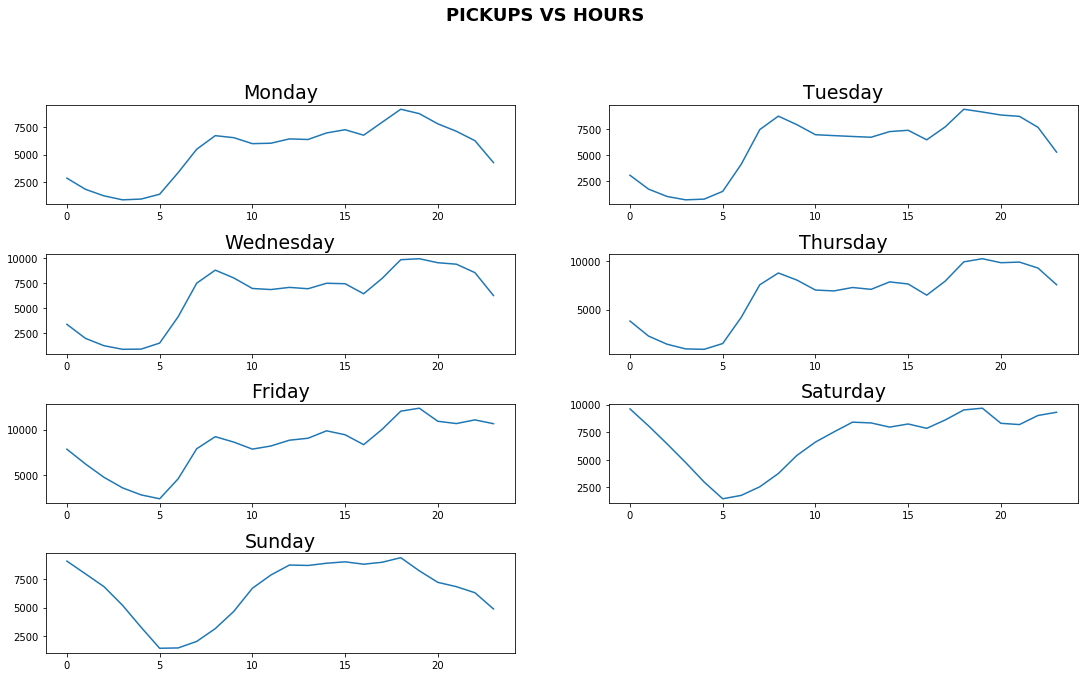

In [109]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('PICKUPS VS HOURS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
# Monday
axis1 = fig.add_subplot(4,2,1)
axis1.set_title('Monday', fontsize=19)
monday = pickups_per_hour.loc[0:0,:].index.get_level_values('hour').tolist()
monday_1 = pickups_per_hour.loc[0:0,:]['dummy'].tolist()
axis1.plot(monday,monday_1)

#Tuesday 
axis2 = fig.add_subplot(4,2,2)
axis2.set_title('Tuesday', fontsize=19)
tuesday = pickups_per_hour.loc[1:1,:].index.get_level_values('hour').tolist()
tuesday_1 = pickups_per_hour.loc[1:1,:]['dummy'].tolist()
axis2.plot(tuesday,tuesday_1)

# Wednesday
axis3 = fig.add_subplot(4,2,3)
axis3.set_title('Wednesday', fontsize=19)
wednesday = pickups_per_hour.loc[2:2,:].index.get_level_values('hour').tolist()
wednesday_1 = pickups_per_hour.loc[2:2,:]['dummy'].tolist()
axis3.plot(wednesday,wednesday_1)

# Thursday
axis4 = fig.add_subplot(4,2,4)
axis4.set_title('Thursday', fontsize=19)
thursday = pickups_per_hour.loc[3:3,:].index.get_level_values('hour').tolist()
thursday_1 = pickups_per_hour.loc[3:3,:]['dummy'].tolist()
axis4.plot(thursday,thursday_1)

# Friday 
axis5 = fig.add_subplot(4,2,5)
axis5.set_title('Friday', fontsize=19)
friday =  pickups_per_hour.loc[4:4,:].index.get_level_values('hour').tolist()
friday_1 = pickups_per_hour.loc[4:4,:]['dummy'].tolist()
axis5.plot(friday,friday_1)

# Saturday
axis6 = fig.add_subplot(4,2,6)
axis6.set_title('Saturday', fontsize=19)
saturday = pickups_per_hour.loc[5:5,:].index.get_level_values('hour').tolist()
saturday_1 = pickups_per_hour.loc[5:5,:]['dummy'].tolist()
axis6.plot(saturday,saturday_1)

# Sunday
axis7 = fig.add_subplot(4,2,7)
axis7.set_title('Sunday', fontsize=19)
sunday = pickups_per_hour.loc[6:6,:].index.get_level_values('hour').tolist()
sunday_1 = pickups_per_hour.loc[6:6,:]['dummy'].tolist()
axis7.plot(sunday,sunday_1)

plt.show()

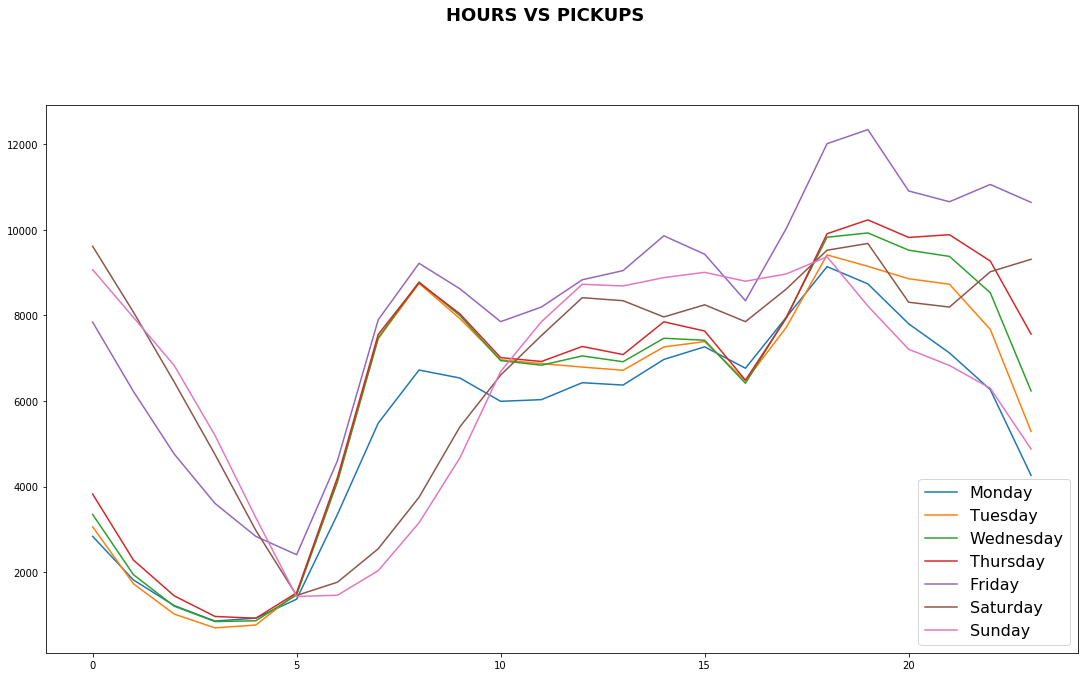

In [125]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS PICKUPS', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
axis1 = fig.add_subplot(1,1,1)
axis1.plot(monday,monday_1)
axis1.plot(tuesday,tuesday_1)
axis1.plot(wednesday,wednesday_1)
axis1.plot(thursday,thursday_1)
axis1.plot(friday,friday_1)
axis1.plot(saturday,saturday_1)
axis1.plot(sunday,sunday_1)
axis1.legend(['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=16) # 
plt.show()

In [126]:
group_dataframe2 = data_january.loc[:, ['weekday','hour','fare_amount', 'tip_amount']]
groups2 = group_dataframe2.groupby(['weekday','hour'])

In [127]:
mean_fare_hour = groups2.mean()

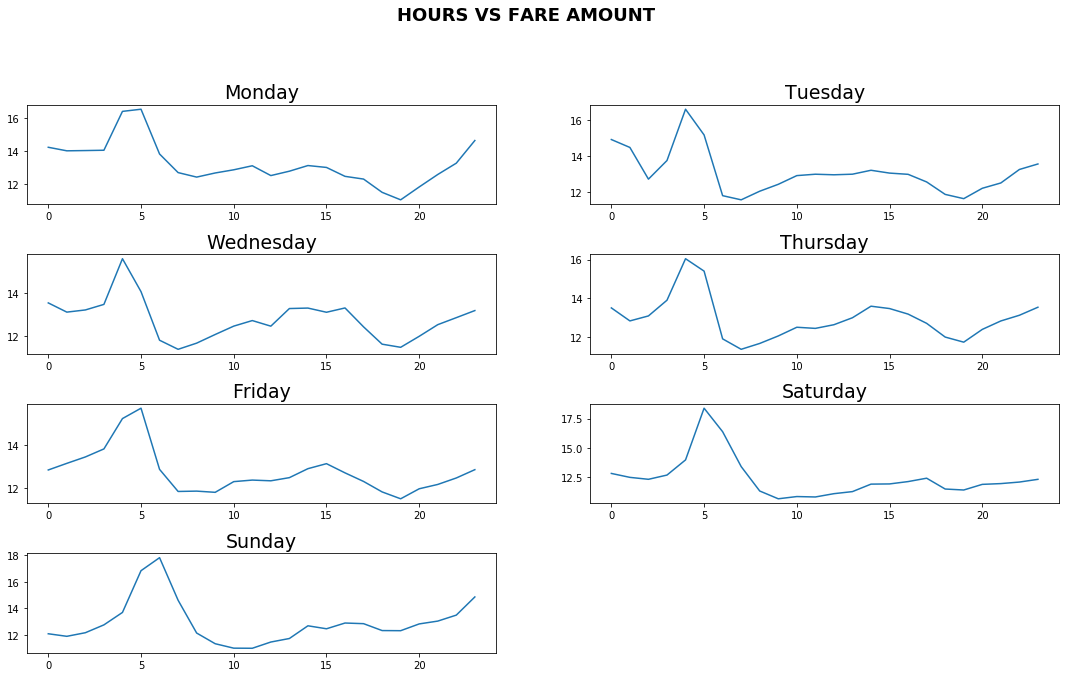

In [134]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS FARE AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    monday = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    monday_1 = mean_fare_hour.loc[i:i,:]['fare_amount'].tolist()
    axis1.plot(monday,monday_1)

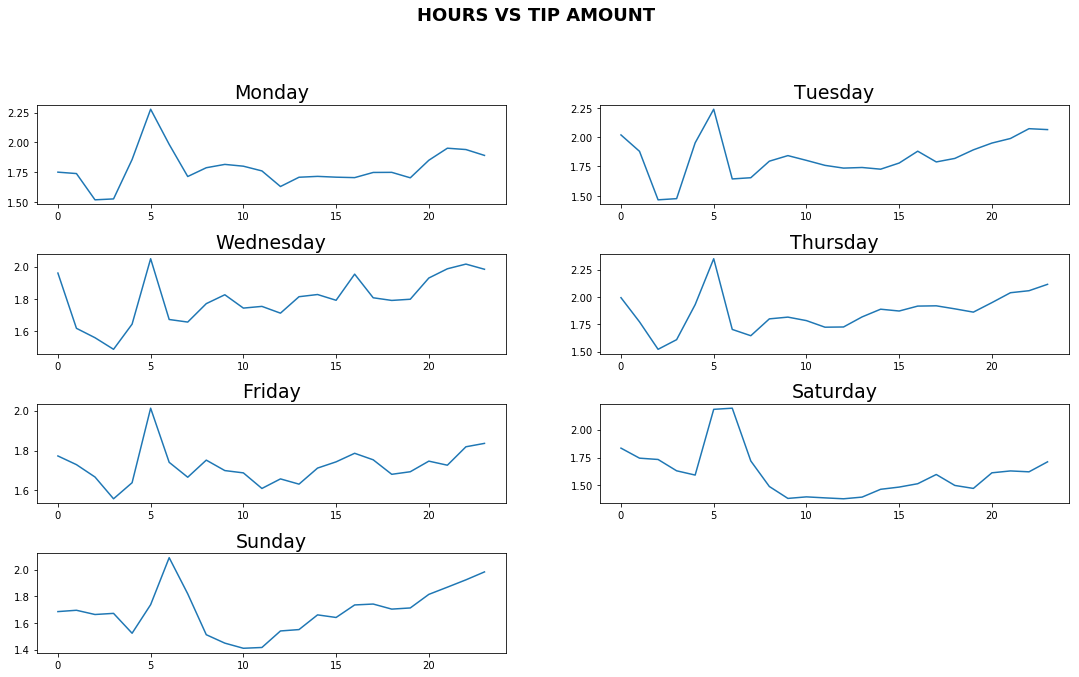

In [144]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TIP AMOUNT', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = mean_fare_hour.loc[i:i,:].index.get_level_values('hour').tolist()
    y = mean_fare_hour.loc[i:i,:]['tip_amount'].tolist()
    axis1.plot(x,y)

In [129]:
group_dataframe3 = data_january.loc[:, ['weekday','hour','trip_distance']]
groups3 = group_dataframe3.groupby(['weekday','hour'])

In [143]:
trip_distances = groups3.mean()

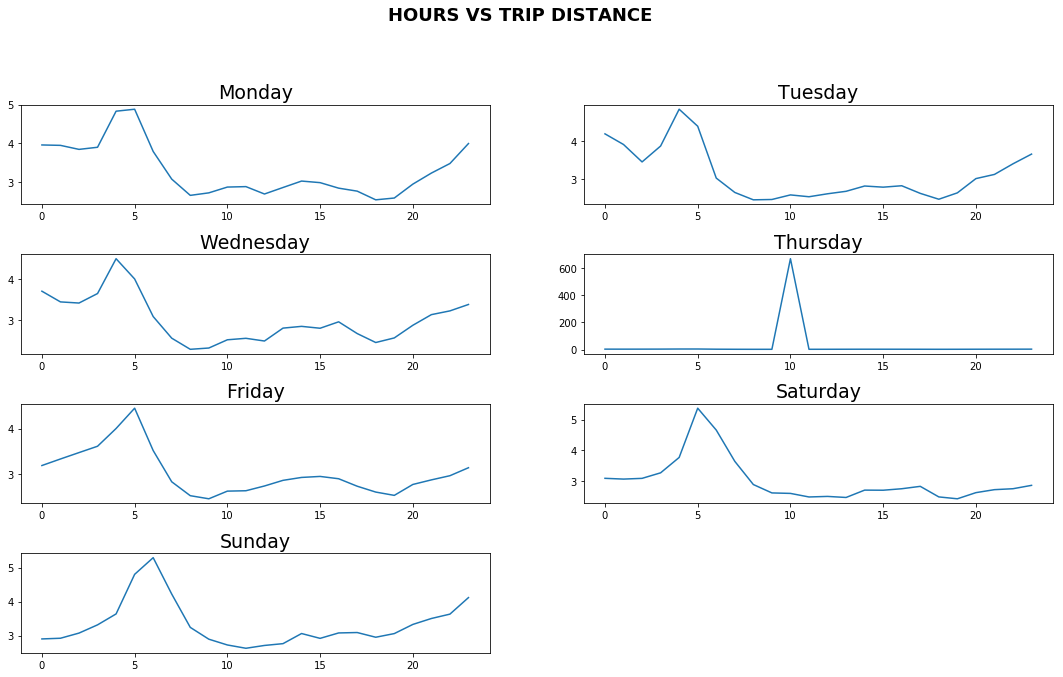

In [146]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.85)
fig.suptitle('HOURS VS TRIP DISTANCE', fontsize=18, fontweight='bold')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=.5)
days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(0,7):
    axis1 = fig.add_subplot(4,2,i+1)
    axis1.set_title(days[i], fontsize=19)
    x = trip_distances.loc[i:i,:].index.get_level_values('hour').tolist()
    y = trip_distances.loc[i:i,:]['trip_distance'].tolist()
    axis1.plot(x,y)